In [ ]:
%reset -f
%load_ext autoreload
%autoreload 2
import logging
logging.getLogger().setLevel(logging.WARNING)
from mechanics import *

system = (
    LagrangeSystem()
    .add_coordinate('x y')
    .add_constant('m g l')
    .define('l\'', 'sqrt(x**2 + y**2)')
    .equate('x**2 + y**2', 'l**2', label='Length')
    .define(r'\theta', 'atan2(x, -y)')
    .define('T', 'm/2 * (dot(x)**2 + dot(y)**2)')
    .define('U', 'm * g * y')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L', constraints='Length')
)
system.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
from mechanics.integrator import *
system_d = (
    system.discretization()
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(RK4(('h')))
    .doit()
)
system_d.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Indices: (i,)
Input: (x(0,), y(0,), \dot{x}(0,), \dot{y}(0,))


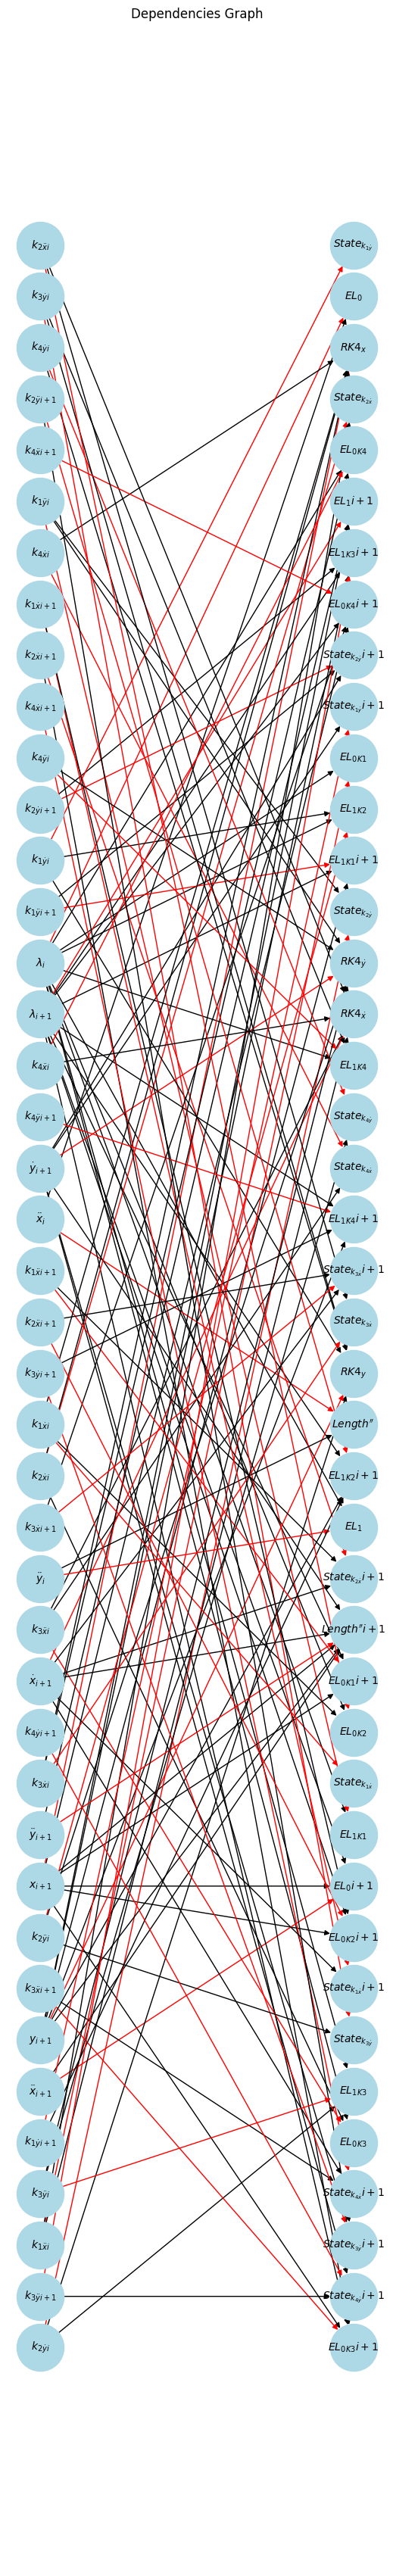

Stage(inputs=[\dot{y}(i,), y(i,), x(i,), \dot{x}(i,)])):
  Block #0 [i] <- ()
    equations = ('{EL_0}', '{EL_1}', "{Length}''")
    variables = [\lambda(i,), \ddot{x}(i,), \ddot{y}(i,)]
    knowns    = [\dot{y}(i,), x(i,), y(i,), \dot{x}(i,)]

  Block #1 [i] <- ()
    equations = ('State_{{k_{1\\dot{x}}}}',)
    variables = [{k_{1\dot{x}}}(i,)]
    knowns    = [\dot{y}(i,), x(i,), y(i,), \dot{x}(i,)]

  Block #2 [i] <- ('#0', '#1')
    equations = ('{EL_0}_{K2}',)
    variables = [{k_{2\ddot{x}}}(i,)]
    knowns    = [y(i,), \dot{y}(i,), {k_{1\dot{x}}}(i,), \dot{x}(i,), x(i,), \lambda(i,)]

  Block #3 [i] <- ('#2',)
    equations = ('State_{{k_{3\\dot{x}}}}',)
    variables = [{k_{3\dot{x}}}(i,)]
    knowns    = [y(i,), \dot{y}(i,), \dot{x}(i,), x(i,), {k_{2\ddot{x}}}(i,)]

  Block #4 [i] <- ('#0',)
    equations = ('{EL_0}_{K1}',)
    variables = [{k_{1\ddot{x}}}(i,)]
    knowns    = [y(i,), \dot{y}(i,), \dot{x}(i,), x(i,), \lambda(i,)]

  Block #5 [i] <- ('#4',)
    equations = ('St

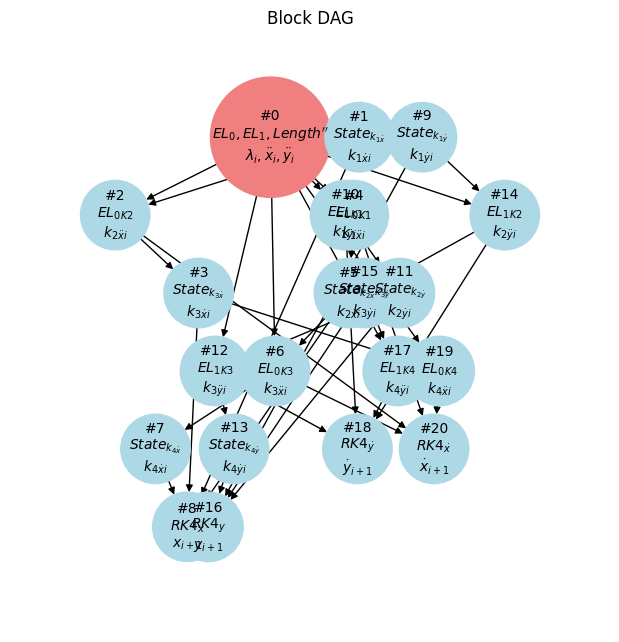

/var/folders/4n/_jcnzrss7571s_0zzmtzqtsr0000gn/T/tmpapd3una4/generated.f90


In [36]:
solver = system_d.solver()

In [34]:
import numpy as np
result = solver.run({
    'l': 1,
    'm': 1,
    'g': 1,
    'N': 100000,
    'h': 0.001,
    'x[0]': 1/np.sqrt(2),
    'y[0]': -1/np.sqrt(2),
    'dotx[0]': 0,
    'doty[0]': 0,
})
# result.newton_converged_iters

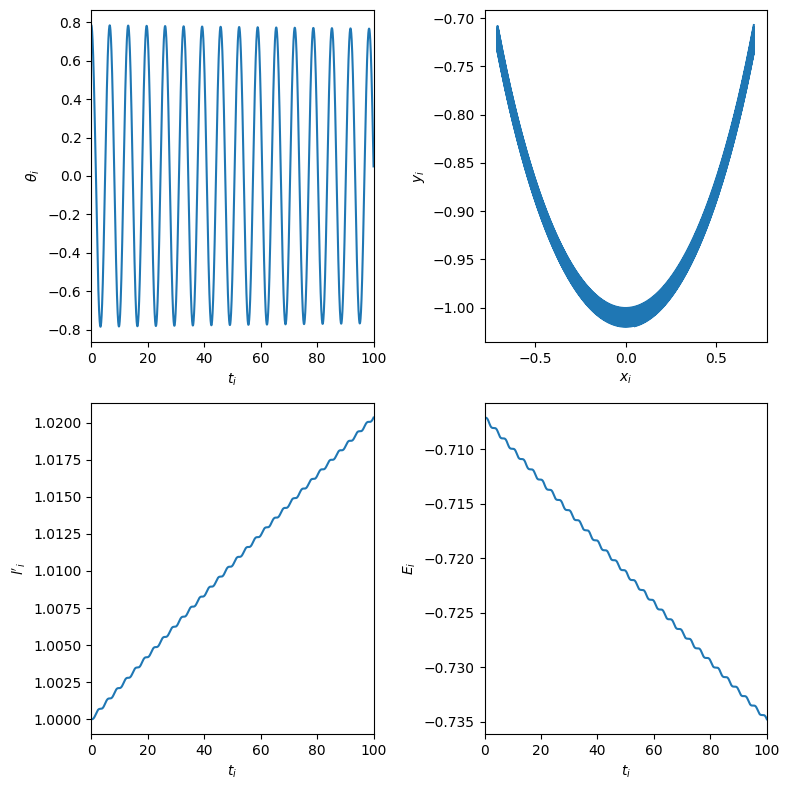

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout='tight', subplot_kw={'projection': result})
axes = axes.flatten()

axes[0].plot('theta')
axes[1].plot('x', 'y')
axes[2].plot('l\'')
axes[3].plot('E')